In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import random

In [2]:
dfdata = pd.read_csv('Brand_mobil_20102017.csv', parse_dates = ['Periode'], index_col = 'Periode')

In [3]:
dfdata.tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-09-01,27297.0,15507.0,15112.0,10934.0,9126.0,9720.0,87696.0
2017-10-01,30114.0,16760.0,17023.0,11831.0,9594.0,9111.0,94433.0
2017-11-01,28855.0,16360.0,15811.0,15291.0,11007.0,8867.0,96191.0
2017-12-01,23724.0,13028.0,15285.0,12775.0,10008.0,10278.0,85098.0
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfdata.isna().tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-09-01,False,False,False,False,False,False,False
2017-10-01,False,False,False,False,False,False,False
2017-11-01,False,False,False,False,False,False,False
2017-12-01,False,False,False,False,False,False,False
NaT,True,True,True,True,True,True,True


In [5]:
dfdata.dropna(inplace = True)

In [6]:
dfdata.head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2010-01-01,20803.0,8302.0,3755.0,6855.0,4815.0,8301.0,52831.0
2010-02-01,21800.0,7518.0,4431.0,8246.0,4638.0,9055.0,55688.0
2010-03-01,26287.0,8084.0,5179.0,9068.0,6203.0,10734.0,65555.0
2010-04-01,24422.0,9298.0,5154.0,9560.0,6013.0,10785.0,65232.0
2010-05-01,21050.0,9485.0,4439.0,9544.0,6043.0,9959.0,60520.0


In [7]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-01 to 2017-12-01
Data columns (total 7 columns):
Toyota        96 non-null float64
Daihatsu      96 non-null float64
Honda         96 non-null float64
Mitsubishi    96 non-null float64
Suzuki        96 non-null float64
Others        96 non-null float64
Total         96 non-null float64
dtypes: float64(7)
memory usage: 6.0 KB


In [8]:
dfdata.describe()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,30317.104167,13915.802083,10126.958333,10633.489583,9778.125000,12375.010417,87136.072917
std,6082.893173,2757.972545,5316.961560,2257.090521,3061.219974,3550.188074,15412.861896
min,13535.000000,6652.000000,1553.000000,5678.000000,4638.000000,5959.000000,49147.000000
25%,25818.750000,12582.250000,5157.000000,8932.000000,7242.000000,9442.250000,76440.500000
50%,30959.500000,14444.000000,9243.000000,10581.000000,9346.500000,12057.000000,88653.500000
75%,34814.000000,15793.000000,14902.000000,12381.250000,12105.750000,15448.750000,97365.500000
max,40806.000000,20445.000000,20475.000000,15291.000000,16902.000000,19209.000000,115973.000000


In [9]:
print('The data Time range from {} to {}'.format(dfdata.index.min(),dfdata.index.max()))

The data Time range from 2010-01-01 00:00:00 to 2017-12-01 00:00:00


## Data Preprocessing

In [10]:
tdata = dfdata[['Toyota','Daihatsu','Honda','Mitsubishi','Suzuki','Others']].resample('MS').mean()
tdata.head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others
Periode,,,,,,
2010-01-01,20803.0,8302.0,3755.0,6855.0,4815.0,8301.0
2010-02-01,21800.0,7518.0,4431.0,8246.0,4638.0,9055.0
2010-03-01,26287.0,8084.0,5179.0,9068.0,6203.0,10734.0
2010-04-01,24422.0,9298.0,5154.0,9560.0,6013.0,10785.0
2010-05-01,21050.0,9485.0,4439.0,9544.0,6043.0,9959.0


In [11]:
td = dfdata['Others'].resample('MS').mean()

C:\Users\GILANG\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


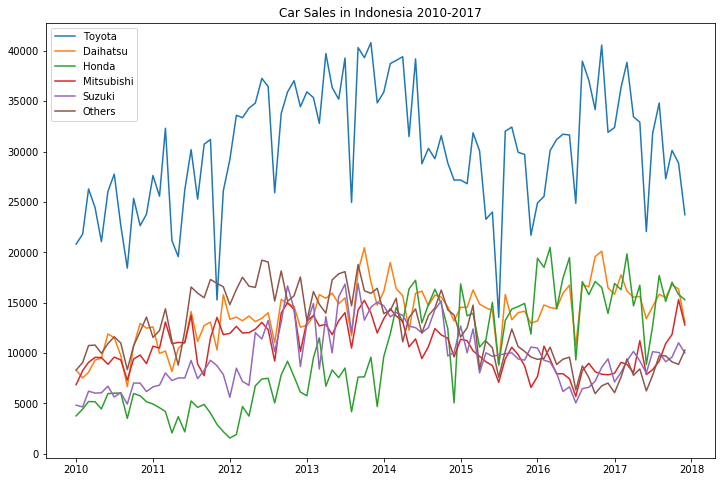

In [12]:
plt.figure(figsize = (12,8))
plt.title('Car Sales in Indonesia 2010-2017')

plt.plot(tdata['Toyota'], label = 'Toyota')
plt.plot(tdata['Daihatsu'], label = 'Daihatsu')
plt.plot(tdata['Honda'], label = 'Honda')
plt.plot(tdata['Mitsubishi'], label = 'Mitsubishi')
plt.plot(tdata['Suzuki'], label = 'Suzuki')
plt.plot(tdata['Others'], label = 'Others')
plt.legend()
plt.show()

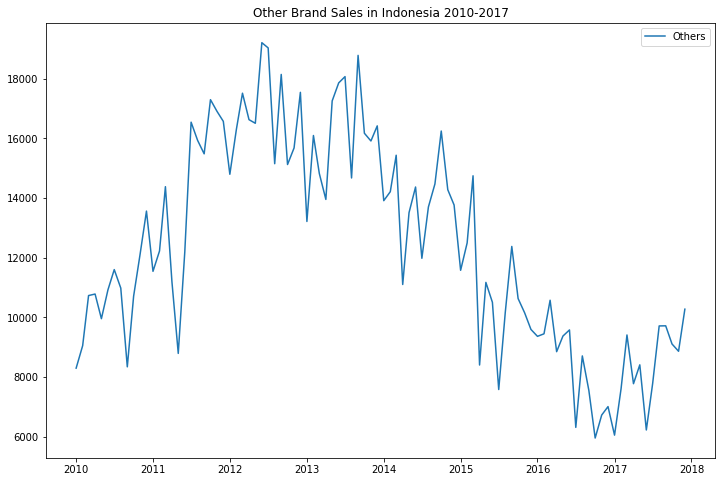

In [13]:
plt.figure(figsize = (12,8))
plt.title('Other Brand Sales in Indonesia 2010-2017')
plt.plot(tdata['Others'], label = 'Others')
plt.legend()
plt.show()

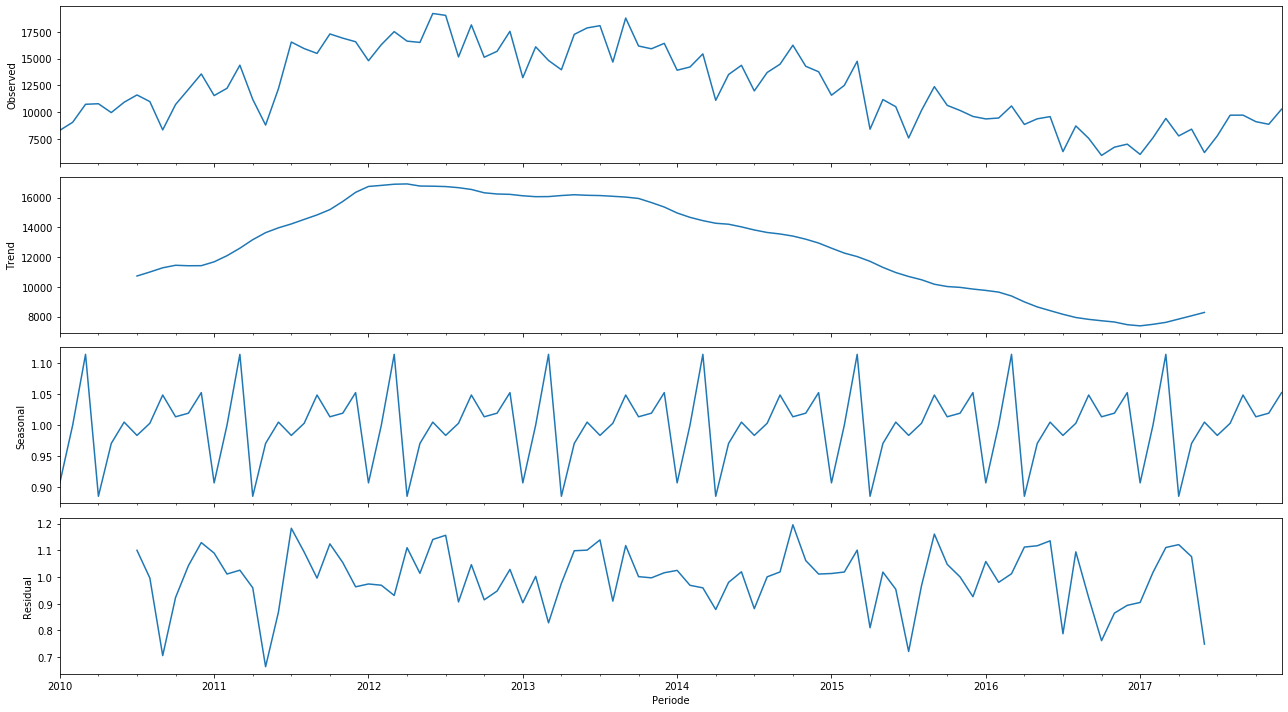

In [14]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(td, model='multipicative')
fig = decomposition.plot()
plt.show()

In [15]:
decomposition.seasonal.head(10)

Periode
2010-01-01    0.907226
2010-02-01    0.999934
2010-03-01    1.113420
2010-04-01    0.885695
2010-05-01    0.970473
2010-06-01    1.004667
2010-07-01    0.983369
2010-08-01    1.002813
2010-09-01    1.048143
2010-10-01    1.013252
Freq: MS, Name: Others, dtype: float64

In [16]:
decomposition.resid.head(10)

Periode
2010-01-01         NaN
2010-02-01         NaN
2010-03-01         NaN
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01    1.100055
2010-08-01    0.996345
2010-09-01    0.705910
2010-10-01    0.923578
Freq: MS, Name: Others, dtype: float64

Made per DataFrame

In [17]:
dftoyota = dfdata['Toyota']
dftoyota.head()

dfdaihatsu = dfdata['Daihatsu']
dfdaihatsu.head()

dfhonda = dfdata['Honda']
dfhonda.head()

dfmitsubishi = dfdata['Mitsubishi']
dfmitsubishi.head()

dfsuzuki = dfdata['Suzuki']
dfsuzuki.head()

dfothers = dfdata['Others']
dfothers.head()

dftoyota.head()
dfdaihatsu.head()
dfhonda.head()
dfmitsubishi.head()
dfsuzuki.head()
dfothers.head()

Periode
2010-01-01     8301.0
2010-02-01     9055.0
2010-03-01    10734.0
2010-04-01    10785.0
2010-05-01     9959.0
Name: Others, dtype: float64

Dickey-Fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
dfcar_brand = [dftoyota,dfdaihatsu,dfhonda,dfmitsubishi,dfsuzuki,dfothers]
dfname = ['Toyota :', 'Daihatsu :','Honda :','Mitsubishi :', 'Suzuki :','Others :']

In [20]:
for index, i in enumerate(dfcar_brand):
    result = adfuller(i)
    print(dfname[index])
    print('ADF Statistic:{}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    
    #all data non statisioner, need diferensiation ( danta < o,o5 )

Toyota :
ADF Statistic:-2.7038963342563753
p-value: 0.07336645650211786
Daihatsu :
ADF Statistic:-2.5512394982040516
p-value: 0.10349954448917553
Honda :
ADF Statistic:-0.7472288279341994
p-value: 0.8341341321905049
Mitsubishi :
ADF Statistic:-1.799449654505583
p-value: 0.3807349590833119
Suzuki :
ADF Statistic:-1.9043213510014503
p-value: 0.3300309496726761
Others :
ADF Statistic:-1.1290154724704395
p-value: 0.7033632852005766


## Differencing

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

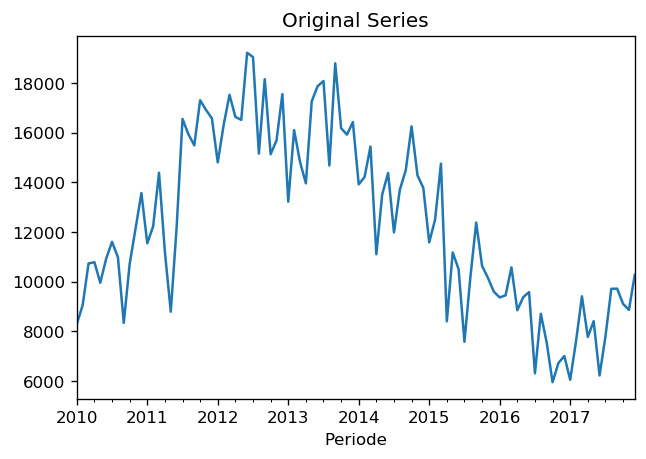

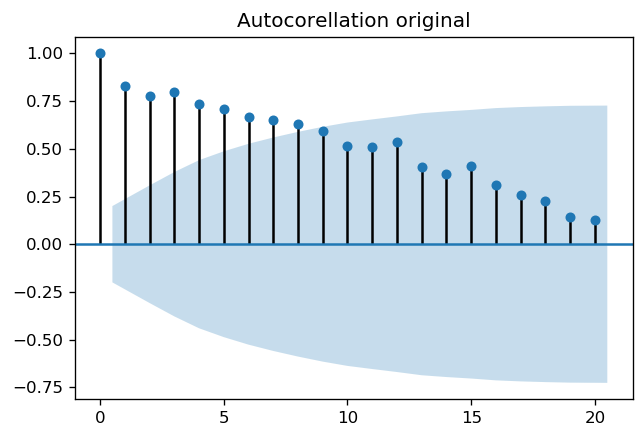

In [22]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

# Original Series
ori = dfothers.plot()
ori.set_title('Original Series')
plot_acf(dfothers, title = 'Autocorellation original')

plt.show()

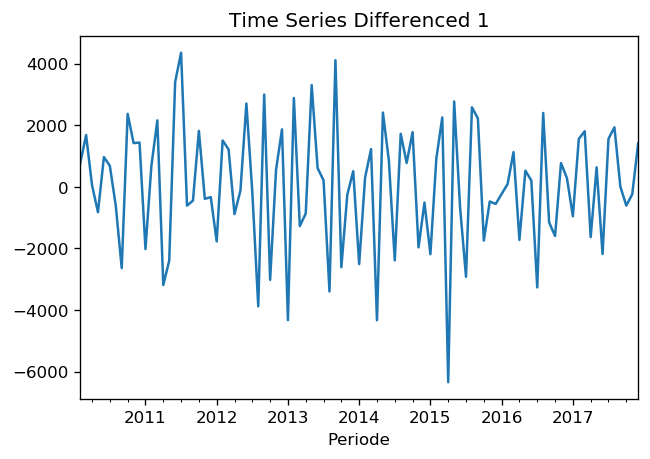

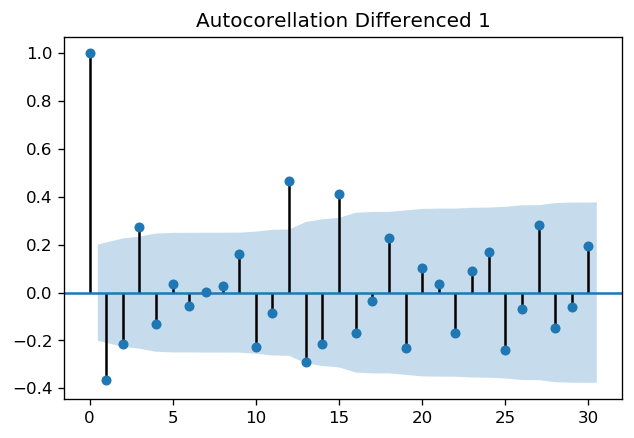

ADF Statistic:-2.320623423580741
p-value: 0.1654027480404312


In [23]:
# Differencing 1
diff1 = dfothers.diff().dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_acf(dfothers.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 1')
plt.show()

#Dif  1
result = adfuller(dfothers.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

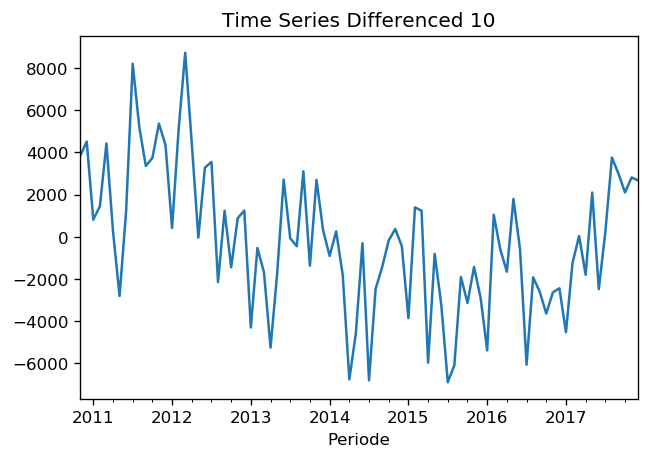

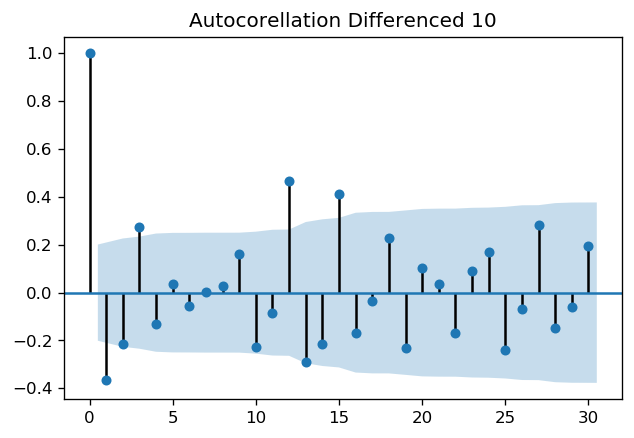

ADF Statistic:-1.7012817913238898
p-value: 0.4304521807183405


In [24]:
# Differencing 
diff10 = dfothers.diff(10).dropna().plot()
diff10.set_title('Time Series Differenced 10')
plot_acf(dfothers.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 10')
plt.show()

#Dif 10
result = adfuller(dfothers.diff(10).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

In [25]:
result = adfuller(dfothers.dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif 1
result = adfuller(dfothers.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif 2
result = adfuller(dfothers.diff(2).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))


ADF Statistic:-1.1290154724704395
p-value: 0.7033632852005766


ADF Statistic:-2.320623423580741
p-value: 0.1654027480404312


ADF Statistic:-2.2739203745456877
p-value: 0.18051715566849863


Data yang akan di gunakan ada lah data awal, karena setelah di dif-1 dan seterusnya p-value semakin tinggi.

In [26]:
o_difference_0 = dfothers.dropna()

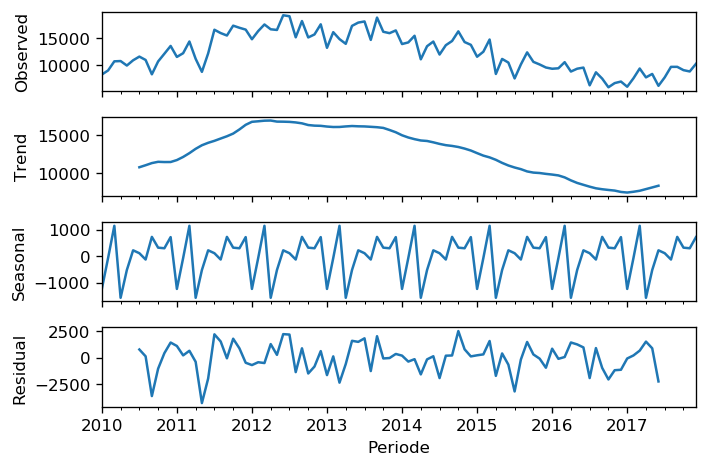

In [27]:
#yang akan digunakanadalah model Additive karena plot terlihat seperti mengikuti addition model
o_decomposition_difference_0 = sm.tsa.seasonal_decompose(o_difference_0, model='additive') 
fig = o_decomposition_difference_0.plot()
plt.show()

In [28]:
o_deseason = o_difference_0/ o_decomposition_difference_0.seasonal

In [29]:
o_decomposition_difference_0.seasonal.tail()

Periode
2017-08-01   -127.840278
2017-09-01    723.909722
2017-10-01    318.802579
2017-11-01    295.754960
2017-12-01    715.909722
Name: Others, dtype: float64

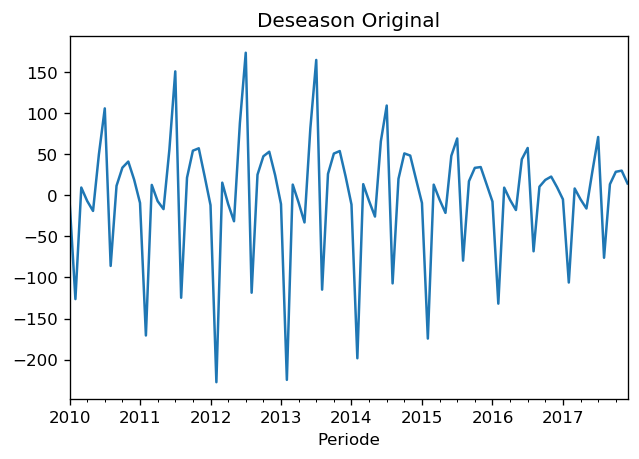

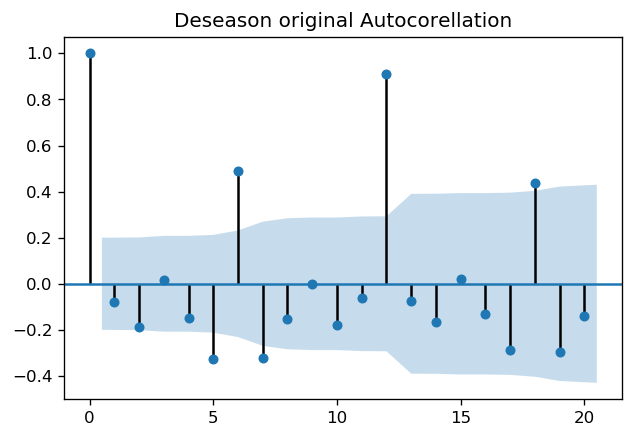

ADF Statistic:-2.725930578994337
p-value: 0.069657624068031


In [30]:
#Deseason original
o_ori_deseason = o_deseason.plot()
o_ori_deseason.set_title('Deseason Original')
plot_acf(o_deseason, title = 'Deseason original Autocorellation')

plt.show()

result = adfuller(o_deseason)
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

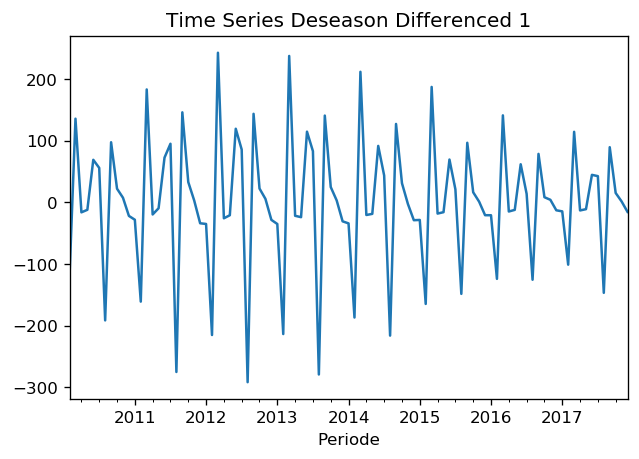

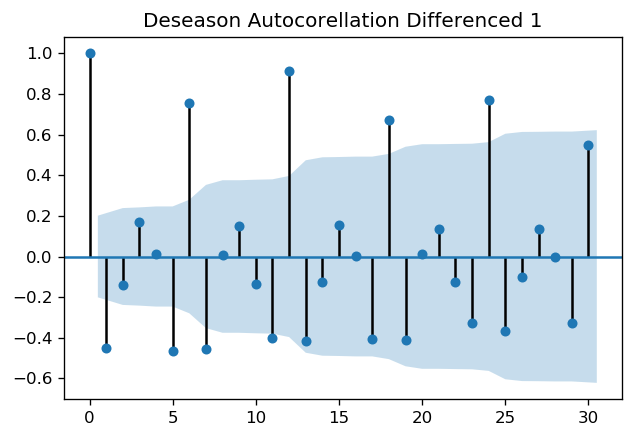

ADF Statistic:-2.725930578994337
p-value: 0.069657624068031


In [31]:
# 1st Differencing
diff1_deseason = o_deseason.diff().dropna().plot()
diff1_deseason.set_title('Time Series Deseason Differenced 1')
plot_acf(o_deseason.diff().dropna(),lags = 30, title = 'Deseason Autocorellation Differenced 1')

plt.show()

result = adfuller(o_deseason.dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


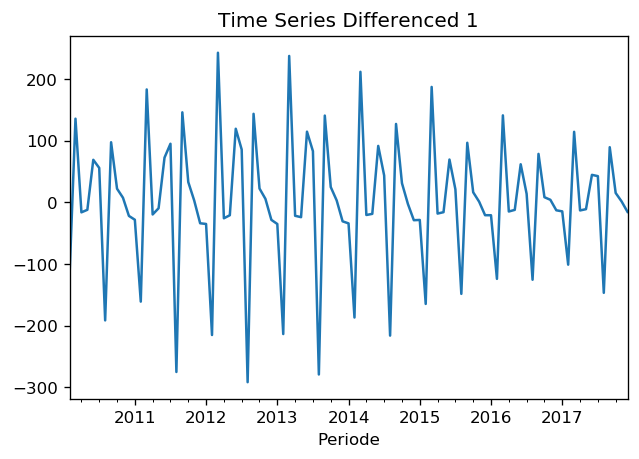

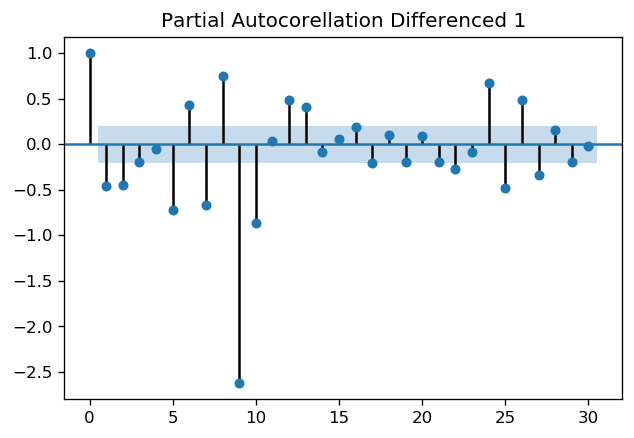

In [32]:
#PACF
diff1 = o_deseason.diff().dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_pacf(o_deseason.diff().dropna(), lags = 30, title = 'Partial Autocorellation Differenced 1')

plt.show()

## ARIMA

In [33]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(o_deseason,order =(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Others   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -544.900
Method:                       css-mle   S.D. of innovations             73.123
Date:                Wed, 20 Nov 2019   AIC                           1097.799
Time:                        07:10:22   BIC                           1108.015
Sample:                    02-01-2010   HQIC                          1101.927
                         - 12-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0373      0.253      0.147      0.883      -0.458       0.533
ar.L1.D.Others    -0.0672      0.102     -0.657      0.513      -0.268       0.133
ma.L1.D.Others    -1.0000      0.027

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


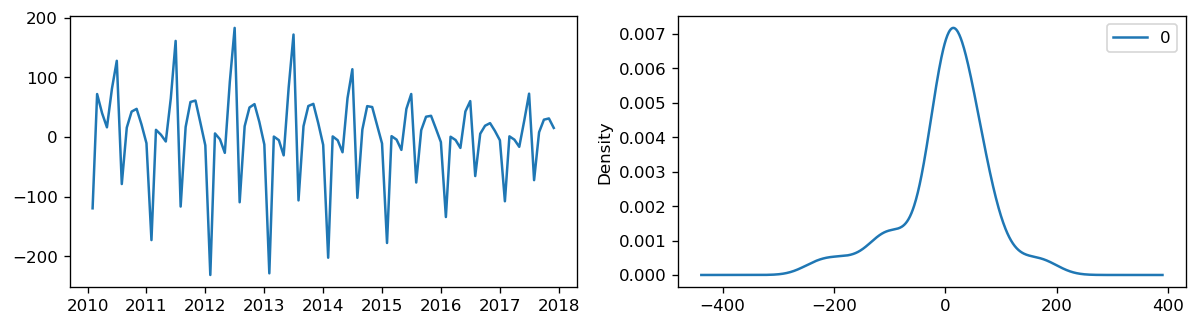

In [34]:
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
ax[0].plot(residuals.index, residuals.values)
residuals.plot.kde( ax=ax[1])

plt.show()

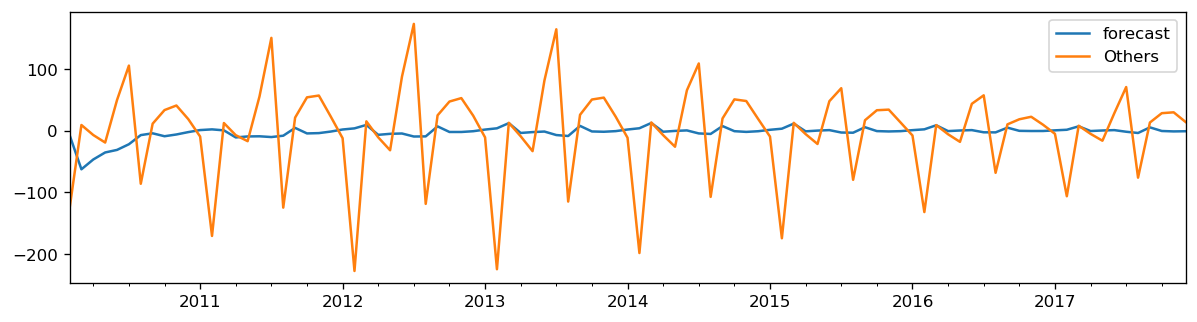

In [35]:
model_fit.plot_predict(dynamic=False)
plt.show()

Validation

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


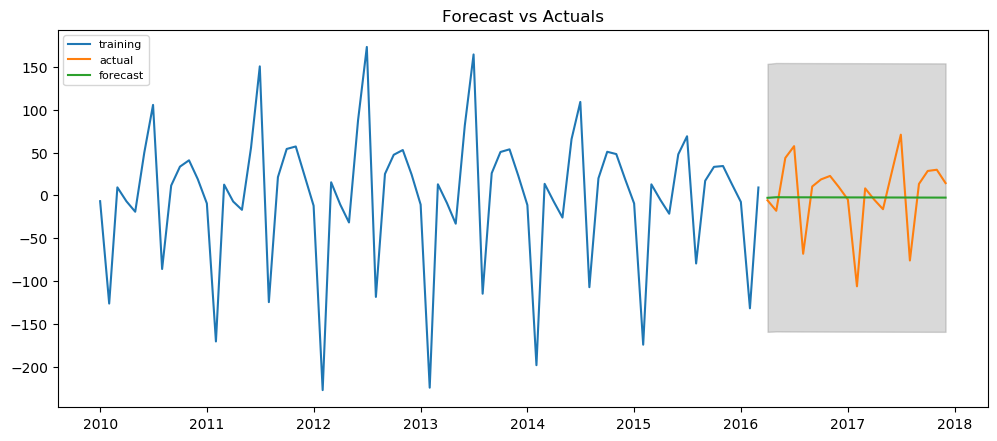

In [36]:
train = o_deseason[:75]
test = o_deseason[75:]
n_periods = 24

model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast (resulted in forecast, standard error, and confidence interval)
fc, se, conf = fitted.forecast(21, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [37]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
  
    return({'mape':mape,'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test)

{'mape': 0.995064328618894,
 'corr': -0.02196109934681362,
 'minmax': -5.022058436183617}

In [38]:
#Auto pd.arima
import pmdarima as pm

model = pm.auto_arima(o_deseason, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series (1 as monthly)
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\GILANG\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fit ARIMA: order=(1, 0, 1); AIC=1084.360, BIC=1094.617, Fit time=0.080 seconds
Fit ARIMA: order=(0, 0, 0); AIC=1100.108, BIC=1105.237, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=1101.536, BIC=1109.229, Fit time=0.050 seconds
Fit ARIMA: order=(0, 0, 1); AIC=1101.183, BIC=1108.876, Fit time=0.039 seconds
Fit ARIMA: order=(2, 0, 1); AIC=1083.740, BIC=1096.562, Fit time=0.166 seconds
Fit ARIMA: order=(2, 0, 0); AIC=1099.828, BIC=1110.086, Fit time=0.045 seconds
Fit ARIMA: order=(2, 0, 2); AIC=1083.728, BIC=1099.114, Fit time=0.197 seconds
Fit ARIMA: order=(3, 0, 3); AIC=1056.074, BIC=1076.589, Fit time=0.687 seconds
Fit ARIMA: order=(2, 0, 3); AIC=1038.336, BIC=1056.286, Fit time=0.372 seconds
Fit ARIMA: order=(1, 0, 2); AIC=1083.841, BIC=1096.662, Fit time=0.143 seconds
Fit ARIMA: order=(1, 0, 3); AIC=1043.934, BIC=1059.321, Fit time=0.454 seconds
Total fit time: 2.242 seconds
                              ARMA Model Results                              
Dep. Variable:        

## SARIMA (Seasonal ARIMA)

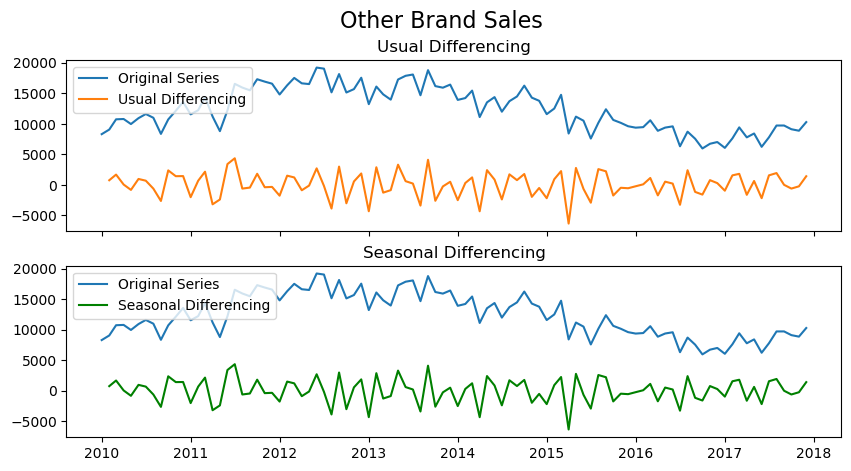

In [39]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(dfothers, label='Original Series')
axes[0].plot(dfothers.diff(), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal Differencing
axes[1].plot(dfothers, label='Original Series')
axes[1].plot(dfothers.diff(), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Other Brand Sales', fontsize=16)
plt.show()

In [40]:
import pmdarima as pm
model = pm.auto_arima(dfothers, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # with Seasonality
                      start_P=0, 
                      start_Q = 0, 
                      D=1,            #Determine the Seasonal Difference as 1
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1510.191, BIC=1515.029, Fit time=0.017 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1500.491, BIC=1510.167, Fit time=0.145 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1495.417, BIC=1505.092, Fit time=0.421 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1489.839, BIC=1501.933, Fit time=1.157 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1499.757, BIC=1509.433, Fit time=0.133 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1490.828, BIC=1505.341, Fit time=3.128 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1501.912, BIC=1509.168, Fit time=0.052 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=1494.216, BIC=1511.148, Fit time=3.423 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1490.725, BIC=1505.238, Fit time=1.498 seconds
Fit ARIMA: order=(0, 1, 0) s

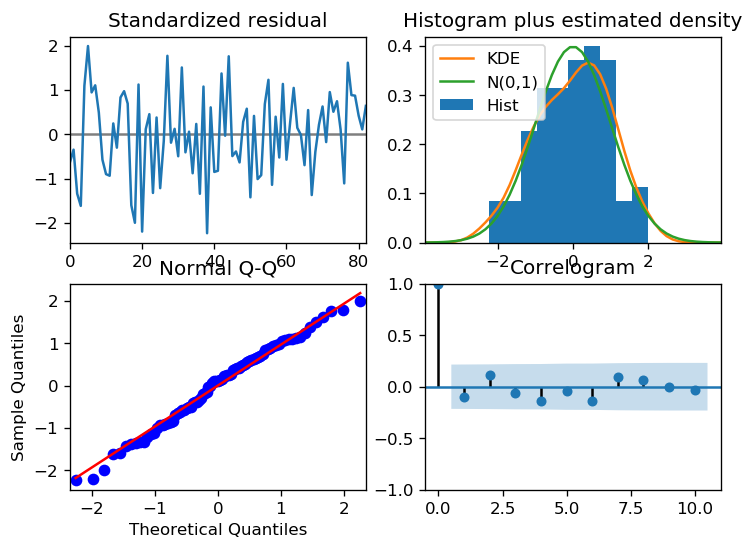

In [41]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

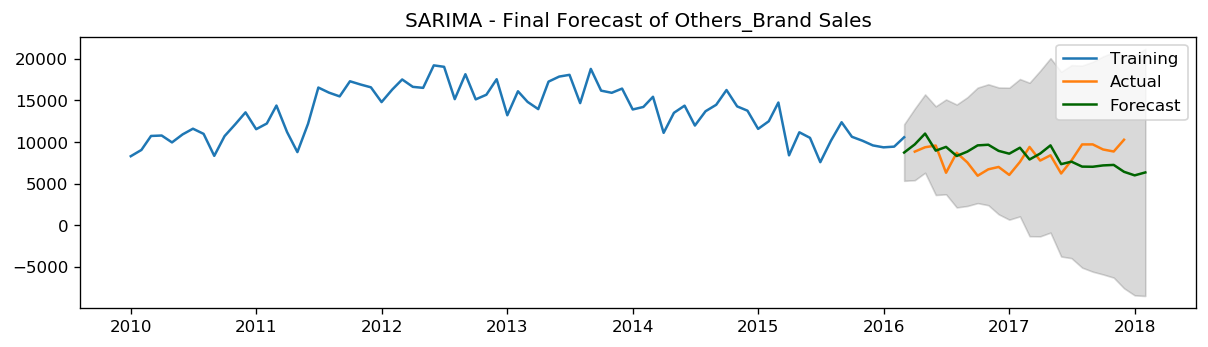

In [42]:
n_periods = 24
train = dfothers[:75]
test = dfothers[75:]

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train, label ='Training')
plt.plot(test, label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Others_Brand Sales")
plt.show()

In [43]:
forecast_accuracy(fc, test)

{'mape': 1.0002987863529438,
 'corr': -0.33181553105140094,
 'minmax': 1.0002987863529438}

## SARIMAX

In [44]:
result_mul = sm.tsa.seasonal_decompose(dfothers[-24:],   # 24last months
                                model='multiplicative', 
                                extrapolate_trend='freq')

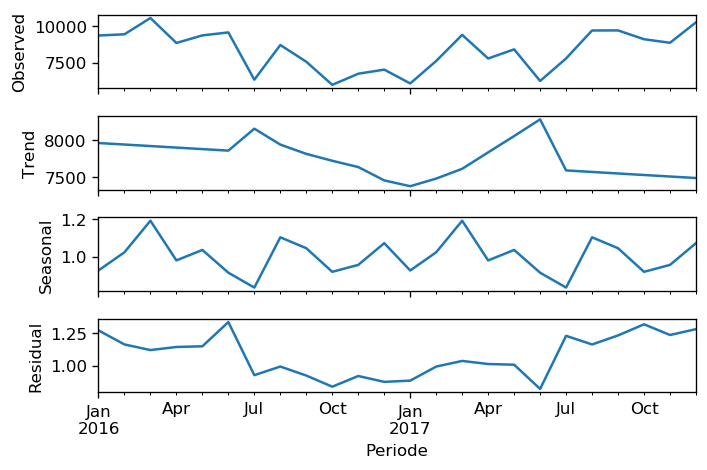

In [45]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
fig = result_mul.plot()
plt.show()

In [46]:
seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

In [47]:
dfothers = pd.DataFrame(dfothers)
dfothers['month'] = dfothers.index.month
dfO = pd.merge(dfothers, seasonal_index, how='left', on='month')
dfO.columns = ['Others_Brand_sales_value_average', 'month', 'seasonal_index']
dfO.index = dfothers.index  # reassign the index.

In [48]:
dfO.head()

,Others_Brand_sales_value_average,month,seasonal_index
Periode,,,
2010-01-01,8301.0,1,0.925857
2010-02-01,9055.0,2,1.023274
2010-03-01,10734.0,3,1.192145
2010-04-01,10785.0,4,0.979774
2010-05-01,9959.0,5,1.035727


In [49]:

smaxmodel = pm.auto_arima(dfO[['Others_Brand_sales_value_average']], exogenous=dfO[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

smaxmodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1523.618, BIC=1538.203, Fit time=0.332 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1597.556, BIC=1604.848, Fit time=0.015 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1530.614, BIC=1542.769, Fit time=0.191 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1555.338, BIC=1567.492, Fit time=0.589 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=1519.282, BIC=1536.298, Fit time=1.386 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=1525.467, BIC=1540.052, Fit time=0.316 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=1521.914, BIC=1541.360, Fit time=3.489 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=1526.195, BIC=1538.349, Fit time=0.210 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 2, 12); AIC=1523.447, BIC=1545.324, Fit time=3.764 seconds
Fit ARIMA: order=(0, 0, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(3, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -750.130
Date:                            Wed, 20 Nov 2019   AIC                           1518.260
Time:                                    07:11:56   BIC                           1540.138
Sample:                                         0   HQIC                          1527.055
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     79.2353    138.675      0.571      0.568    -192.563     351.033
x1            27.7318   1681.972      0.016      0.987   -3268.873    3324.336
ar.L1         -0.3676      0.124     -2.969      0.003      -0.610      -0.125
ar.L2          0.6878      0.088      7.847      0.000       0.516       0.860
ar.L3          0.3288      0.129      2.542      0.011       0.075       0.582
ma.L1          0.9999      0.788      1.269      0.204      -0.544       2.544
ar.S.L12       0.5471      0.315      1.737      0.082      -0.070       1.164
ma.S.L12      -0.9466      0.949     -0.997      0.319      -2.807       0.913
sigma2      3.229e+06      0.003   9.24e+08      0.000    3.23e+06    3.23e+06
===================================================================================
Ljung-Box (Q):                       23.56   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.98   Prob(JB):                         0.99
Heteroskedasticity (H):               0.35   Skew:                            -0.04
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.33e+28. Standard errors may be unstable.
"""

In [50]:
seasonal_index

,Others,month
Periode,,
2017-01-01,0.925857,1
2017-02-01,1.023274,2
2017-03-01,1.192145,3
2017-04-01,0.979774,4
2017-05-01,1.035727,5
2017-06-01,0.913894,6
2017-07-01,0.834387,7
2017-08-01,1.103440,8
2017-09-01,1.044948,9


SARIMAX done..
forcast next 24month

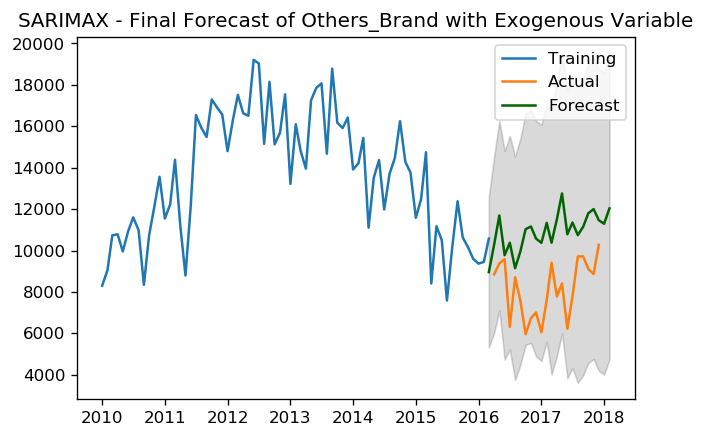

In [51]:
train = dfO[:75]
test = dfO[75:]
n_periods = 24

fitted, confint = smaxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index['Others'], 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train['Others_Brand_sales_value_average'], label ='Training')
plt.plot(test['Others_Brand_sales_value_average'], label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX - Final Forecast of Others_Brand with Exogenous Variable")
plt.show()

## Prophet

In [52]:
test = dfothers.copy()

In [53]:
test.drop('month', axis = 1, inplace = True)

In [54]:
test.reset_index(inplace=True)

In [55]:
prediction_size = 7
train_df = test[:-prediction_size]

In [56]:
from fbprophet import Prophet 
m = Prophet()

In [57]:
train_df.columns = ['ds','y']
train_df.head()

,ds,y
0,2010-01-01,8301.0
1,2010-02-01,9055.0
2,2010-03-01,10734.0
3,2010-04-01,10785.0
4,2010-05-01,9959.0


In [58]:
m.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
future = m.make_future_dataframe(periods=prediction_size, freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,10036.882376,6919.834303,10550.504921,10036.882376,10036.882376,-1255.263584,-1255.263584,-1255.263584,-1255.263584,-1255.263584,-1255.263584,0.0,0.0,0.0,8781.618792
1,2010-02-01,10254.934092,8265.438927,12024.885161,10254.934092,10254.934092,-107.045269,-107.045269,-107.045269,-107.045269,-107.045269,-107.045269,0.0,0.0,0.0,10147.888823
2,2010-03-01,10451.884030,10071.703441,13848.252450,10451.884030,10451.884030,1513.734992,1513.734992,1513.734992,1513.734992,1513.734992,1513.734992,0.0,0.0,0.0,11965.619022
3,2010-04-01,10669.935746,7432.453129,11274.114630,10669.935746,10669.935746,-1239.871940,-1239.871940,-1239.871940,-1239.871940,-1239.871940,-1239.871940,0.0,0.0,0.0,9430.063806
4,2010-05-01,10880.953536,8491.404655,12330.487602,10880.953536,10880.953536,-437.132101,-437.132101,-437.132101,-437.132101,-437.132101,-437.132101,0.0,0.0,0.0,10443.821435


In [60]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,10036.882376,6919.834303,10550.504921,10036.882376,10036.882376,-1255.263584,-1255.263584,-1255.263584,-1255.263584,-1255.263584,-1255.263584,0.0,0.0,0.0,8781.618792
1,2010-02-01,10254.934092,8265.438927,12024.885161,10254.934092,10254.934092,-107.045269,-107.045269,-107.045269,-107.045269,-107.045269,-107.045269,0.0,0.0,0.0,10147.888823
2,2010-03-01,10451.884030,10071.703441,13848.252450,10451.884030,10451.884030,1513.734992,1513.734992,1513.734992,1513.734992,1513.734992,1513.734992,0.0,0.0,0.0,11965.619022
3,2010-04-01,10669.935746,7432.453129,11274.114630,10669.935746,10669.935746,-1239.871940,-1239.871940,-1239.871940,-1239.871940,-1239.871940,-1239.871940,0.0,0.0,0.0,9430.063806
4,2010-05-01,10880.953536,8491.404655,12330.487602,10880.953536,10880.953536,-437.132101,-437.132101,-437.132101,-437.132101,-437.132101,-437.132101,0.0,0.0,0.0,10443.821435
5,2010-06-01,11099.005252,9889.995967,13504.063513,11099.005252,11099.005252,475.700775,475.700775,475.700775,475.700775,475.700775,475.700775,0.0,0.0,0.0,11574.706027
6,2010-07-01,11310.023042,9557.234731,13401.019179,11310.023042,11310.023042,162.951580,162.951580,162.951580,162.951580,162.951580,162.951580,0.0,0.0,0.0,11472.974622
7,2010-08-01,11528.074758,9768.224445,13407.431040,11528.074758,11528.074758,97.529255,97.529255,97.529255,97.529255,97.529255,97.529255,0.0,0.0,0.0,11625.604013
8,2010-09-01,11746.126474,10535.070158,14182.523425,11746.126474,11746.126474,650.793806,650.793806,650.793806,650.793806,650.793806,650.793806,0.0,0.0,0.0,12396.920280
9,2010-10-01,11957.144263,10653.645477,14465.021294,11957.144263,11957.144263,587.610392,587.610392,587.610392,587.610392,587.610392,587.610392,0.0,0.0,0.0,12544.754655


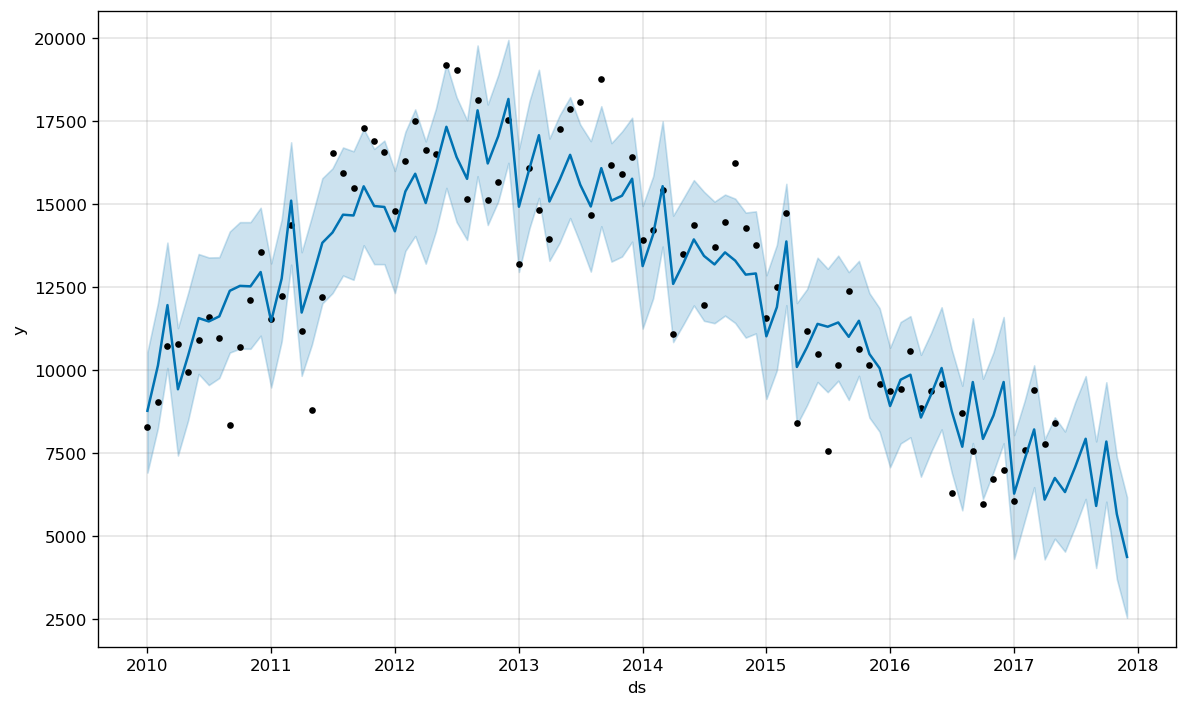

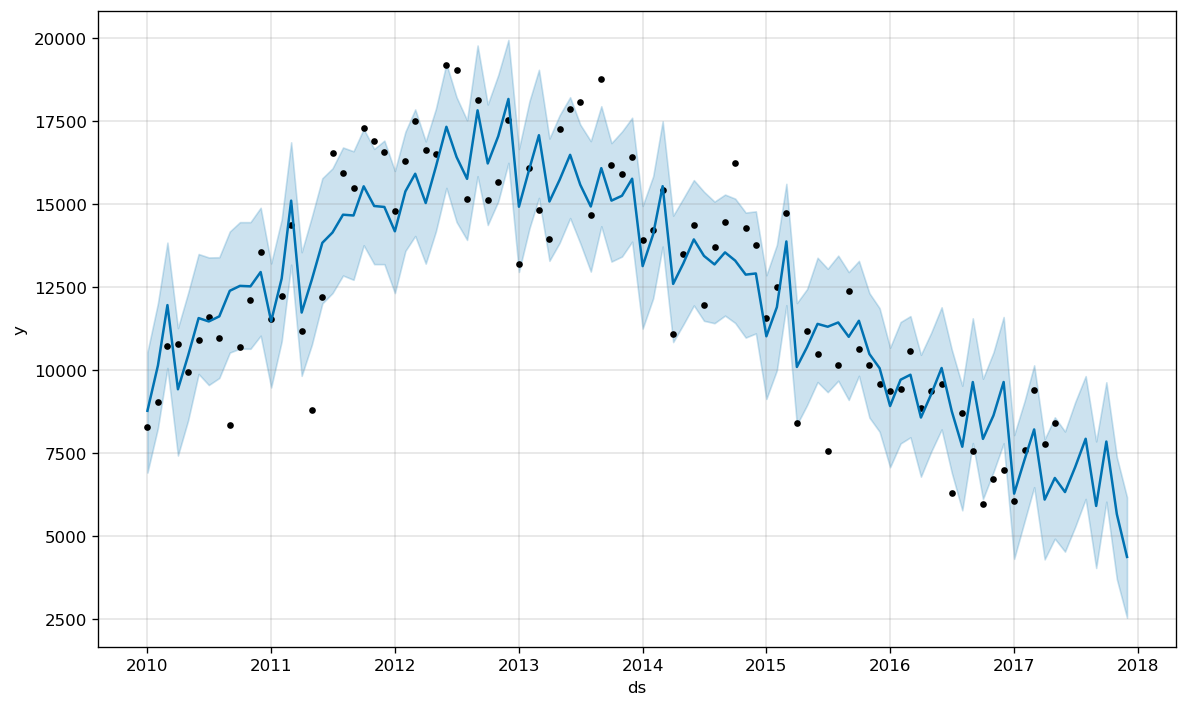

In [61]:
m.plot(forecast)

In [62]:
test.head()

,Periode,Others
0,2010-01-01,8301.0
1,2010-02-01,9055.0
2,2010-03-01,10734.0
3,2010-04-01,10785.0
4,2010-05-01,9959.0


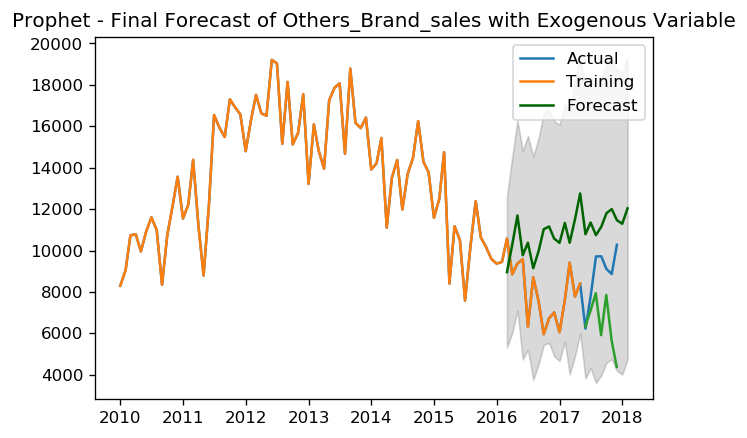

In [63]:
plt.plot(test['Periode'],test['Others'], label = 'Actual')
plt.plot(train_df['ds'],train_df['y'], label ='Training')
plt.plot(forecast['ds'].iloc[-7:],forecast['yhat'].iloc[-7:])
plt.plot(fitted_series, color='darkgreen', label ='Forecast')

plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Prophet - Final Forecast of Others_Brand_sales with Exogenous Variable")
plt.show()

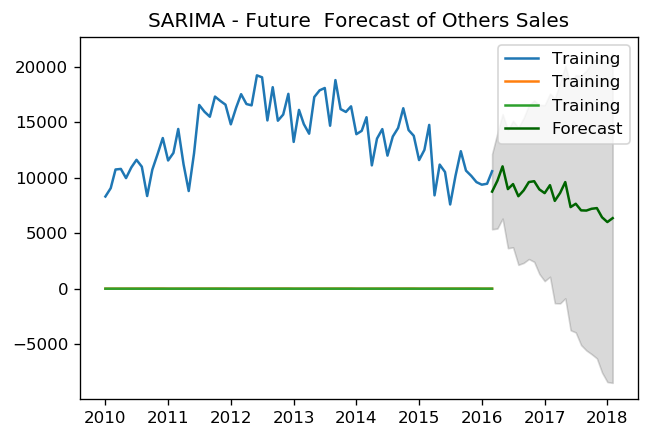

In [64]:
training=dfothers
n_periode=12

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.plot(train, label ='Training')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Future  Forecast of Others Sales")
plt.show()

In [65]:
others_predict=pd.DataFrame(fitted_series)
others_predict.columns=['others']

In [66]:
others_predict.to_csv('others_predict.csv')